# Analyse data which was used for train and test:

In [1]:
import os, sys
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import os.path
from os import listdir
import glob
import matplotlib.pyplot as plt
from model_validation import model_validation
from sklearn.metrics import accuracy_score
import numpy as np
from prepare_data import data_split
import json
from os.path import isfile, join

In [2]:
def read_json_data(file_input):

        # Opening JSON file
    file_json_data = open(file_input)
    data_json_data = json.load(file_json_data)
    
    return data_json_data

In [3]:
def get_df_asum_energy(path):
    asum_list = []
    energy_list = []
    
    onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]

    for i_file in onlyfiles:
        if i_file.find('.~') != -1:
            print('wrong : ', i_file)
        else:
            print('file : ', i_file)
    
            df_file = pd.read_excel(path + i_file, index_col=0) 
            asum_list.append(list(df_file['asum: max amplitude']))
            energy_list.append(list(df_file['energy TeV.']))
            
    asum_list = np.array(asum_list).flatten(order='C')
    energy_list = np.array(energy_list).flatten(order='C')
            
    return asum_list, energy_list

In [16]:
path_database_muons = '/mnt/yggdrasil_scratch/muon_nsbx1/anomaly_data/'
asum_tmp, energy_tmp = get_df_asum_energy(path_database_muons)

file :  muon_12.0GeV_2.63_off_axis_184.21_.simtel.gz_n_events_1000_df.xlsx
file :  muon_26.0GeV_1.08_off_axis_268.79_.simtel.gz_n_events_1000_df.xlsx
file :  muon_12.0GeV_0.19_off_axis_205.42_.simtel.gz_n_events_1000_df.xlsx
file :  muon_5GeV_0.06_off_axis_104.32_.simtel.gz_n_events_1000_df.xlsx
file :  muon_10.0GeV_1.50_off_axis_55.50_.simtel.gz_n_events_1000_df.xlsx
file :  muon_6.0GeV_1.53_off_axis_253.45_.simtel.gz_n_events_1000_df.xlsx
file :  muon_6.0GeV_2.96_off_axis_174.42_.simtel.gz_n_events_1000_df.xlsx
file :  muon_6.0GeV_2.51_off_axis_242.80_.simtel.gz_n_events_1000_df.xlsx
file :  muon_14.0GeV_1.63_off_axis_102.52_.simtel.gz_n_events_1000_df.xlsx
file :  muon_38.0GeV_2.42_off_axis_88.26_.simtel.gz_n_events_1000_df.xlsx
file :  muon_16.0GeV_1.23_off_axis_300.45_.simtel.gz_n_events_1000_df.xlsx
file :  muon_38.0GeV_2.75_off_axis_279.67_.simtel.gz_n_events_1000_df.xlsx
file :  muon_34.0GeV_0.82_off_axis_244.67_.simtel.gz_n_events_1000_df.xlsx
file :  muon_32.0GeV_0.39_off_axi

file :  muon_5GeV_1.77_off_axis_181.90_.simtel.gz_n_events_1000_df.xlsx
file :  muon_38.0GeV_1.97_off_axis_124.65_.simtel.gz_n_events_1000_df.xlsx
file :  muon_20.0GeV_2.15_off_axis_49.72_.simtel.gz_n_events_1000_df.xlsx
file :  muon_36.0GeV_1.86_off_axis_244.44_.simtel.gz_n_events_1000_df.xlsx
file :  muon_6.0GeV_0.05_off_axis_323.88_.simtel.gz_n_events_1000_df.xlsx
file :  muon_36.0GeV_1.82_off_axis_303.60_.simtel.gz_n_events_1000_df.xlsx
file :  muon_20.0GeV_0.10_off_axis_77.96_.simtel.gz_n_events_1000_df.xlsx
file :  muon_8.0GeV_0.88_off_axis_327.32_.simtel.gz_n_events_1000_df.xlsx
file :  muon_34.0GeV_0.15_off_axis_96.96_.simtel.gz_n_events_1000_df.xlsx
file :  muon_16.0GeV_0.85_off_axis_137.97_.simtel.gz_n_events_1000_df.xlsx
file :  muon_22.0GeV_0.18_off_axis_12.77_.simtel.gz_n_events_1000_df.xlsx
file :  muon_10.0GeV_0.47_off_axis_155.75_.simtel.gz_n_events_1000_df.xlsx
file :  muon_30.0GeV_2.17_off_axis_143.69_.simtel.gz_n_events_1000_df.xlsx
file :  muon_24.0GeV_2.10_off_axis

file :  muon_20.0GeV_2.73_off_axis_213.70_.simtel.gz_n_events_1000_df.xlsx
file :  muon_12.0GeV_2.10_off_axis_133.78_.simtel.gz_n_events_1000_df.xlsx
file :  muon_36.0GeV_2.05_off_axis_260.34_.simtel.gz_n_events_1000_df.xlsx
file :  muon_38.0GeV_0.48_off_axis_128.78_.simtel.gz_n_events_1000_df.xlsx
file :  muon_14.0GeV_0.57_off_axis_1.44_.simtel.gz_n_events_1000_df.xlsx
file :  muon_28.0GeV_2.39_off_axis_340.10_.simtel.gz_n_events_1000_df.xlsx
file :  muon_6.0GeV_0.12_off_axis_37.54_.simtel.gz_n_events_1000_df.xlsx
file :  muon_30.0GeV_1.25_off_axis_127.62_.simtel.gz_n_events_1000_df.xlsx
file :  muon_5GeV_0.77_off_axis_274.96_.simtel.gz_n_events_1000_df.xlsx
file :  muon_18.0GeV_2.49_off_axis_26.96_.simtel.gz_n_events_1000_df.xlsx
file :  muon_8.0GeV_1.85_off_axis_122.72_.simtel.gz_n_events_1000_df.xlsx
file :  muon_34.0GeV_2.95_off_axis_245.05_.simtel.gz_n_events_1000_df.xlsx
file :  muon_22.0GeV_1.15_off_axis_115.05_.simtel.gz_n_events_1000_df.xlsx
file :  muon_12.0GeV_2.30_off_axis

file :  muon_14.0GeV_2.77_off_axis_160.22_.simtel.gz_n_events_1000_df.xlsx
file :  muon_14.0GeV_1.55_off_axis_125.27_.simtel.gz_n_events_1000_df.xlsx
file :  muon_38.0GeV_1.90_off_axis_251.73_.simtel.gz_n_events_1000_df.xlsx
file :  muon_28.0GeV_0.02_off_axis_248.88_.simtel.gz_n_events_1000_df.xlsx
file :  muon_14.0GeV_0.75_off_axis_63.46_.simtel.gz_n_events_1000_df.xlsx
file :  muon_26.0GeV_1.60_off_axis_352.71_.simtel.gz_n_events_1000_df.xlsx
file :  muon_22.0GeV_1.68_off_axis_217.93_.simtel.gz_n_events_1000_df.xlsx
file :  muon_32.0GeV_1.83_off_axis_191.80_.simtel.gz_n_events_1000_df.xlsx
file :  muon_36.0GeV_1.30_off_axis_77.41_.simtel.gz_n_events_1000_df.xlsx
file :  muon_38.0GeV_2.11_off_axis_13.47_.simtel.gz_n_events_1000_df.xlsx
file :  muon_10.0GeV_0.88_off_axis_330.97_.simtel.gz_n_events_1000_df.xlsx
file :  muon_5GeV_1.30_off_axis_300.88_.simtel.gz_n_events_1000_df.xlsx
file :  muon_8.0GeV_1.63_off_axis_352.78_.simtel.gz_n_events_1000_df.xlsx
file :  muon_20.0GeV_2.51_off_ax

file :  muon_12.0GeV_0.94_off_axis_317.88_.simtel.gz_n_events_1000_df.xlsx
file :  muon_34.0GeV_1.70_off_axis_71.79_.simtel.gz_n_events_1000_df.xlsx
file :  muon_32.0GeV_1.52_off_axis_105.93_.simtel.gz_n_events_1000_df.xlsx
file :  muon_18.0GeV_1.81_off_axis_248.01_.simtel.gz_n_events_1000_df.xlsx
file :  muon_5GeV_2.84_off_axis_82.35_.simtel.gz_n_events_1000_df.xlsx
file :  muon_5GeV_2.01_off_axis_298.81_.simtel.gz_n_events_1000_df.xlsx
file :  muon_28.0GeV_1.76_off_axis_182.27_.simtel.gz_n_events_1000_df.xlsx
file :  muon_12.0GeV_0.78_off_axis_45.05_.simtel.gz_n_events_1000_df.xlsx
file :  muon_28.0GeV_1.11_off_axis_203.73_.simtel.gz_n_events_1000_df.xlsx
file :  muon_32.0GeV_1.01_off_axis_273.48_.simtel.gz_n_events_1000_df.xlsx
file :  muon_10.0GeV_1.34_off_axis_354.02_.simtel.gz_n_events_1000_df.xlsx
file :  muon_6.0GeV_1.03_off_axis_335.59_.simtel.gz_n_events_1000_df.xlsx
file :  muon_24.0GeV_1.67_off_axis_88.34_.simtel.gz_n_events_1000_df.xlsx
file :  muon_24.0GeV_2.57_off_axis_2

/home/andrii/anaconda3/envs/cta-cnn/lib/python3.7/site-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/andrii/anaconda3/envs/cta-cnn/lib/python3.7/site-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [17]:
files = read_json_data('/home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/4_classes_data/test_results/resnet_2stg_data_test_011_nsb_wrong_files.json')

In [18]:
muons_as_nsb = read_json_data('/home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/4_classes_data/test_results/resnet_2stg_data_test_011_nsb_wrong_files.json')

In [19]:
muons_as_nsb = read_json_data('/home/andrii/work/cnn/data_types/4_class/4_clases_muons_as_nsb_dict.json')
shower_as_nsb = read_json_data('/home/andrii/work/cnn/data_types/4_class/4_clases_showers_as_nsb_dict.json')
proton_as_nsb = read_json_data('/home/andrii/work/cnn/data_types/4_class/4_clases_protons_as_nsb_dict.json')

In [20]:
#nsb_as_muon = read_json_data('/home/andrii/work/cnn/data_types/4_class/4_clases_nsb_as_muons_dict.json')
nsb_as_shower = read_json_data('/home/andrii/work/cnn/data_types/4_class/4_clases_nsb_as_showers_dict.json')
nsb_as_proton = read_json_data('/home/andrii/work/cnn/data_types/4_class/4_clases_nsb_as_protons_dict.json')

In [21]:
nsb_as_proton.keys()

dict_keys(['shower_type', 'energy TeV.', 'asum', 'off_axis', 'phi'])

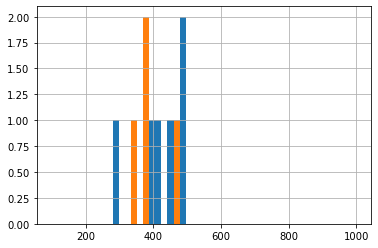

In [199]:
#nsb_as_muon_flat = [item for sublist in nsb_as_muon['asum'] for item in sublist]
nsb_as_shower_flat = [item for sublist in nsb_as_shower['asum'] for item in sublist]
nsb_as_proton_flat = [item for sublist in nsb_as_proton['asum'] for item in sublist]

#plt.hist(nsb_as_muon_flat, bins = 50, range = [100, 1000])
plt.hist(nsb_as_shower_flat, bins = 50, range = [100, 1000])
plt.hist(nsb_as_proton_flat, bins = 50, range = [100, 1000])
plt.grid()

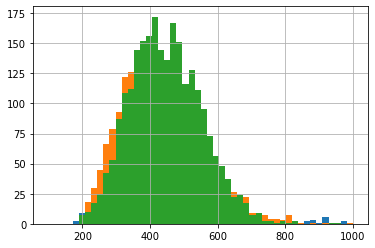

In [22]:
muons_as_nsb_flat = [item for sublist in muons_as_nsb['asum'] for item in sublist]
proton_as_nsb_flat = [item for sublist in proton_as_nsb['asum'] for item in sublist]
shower_as_nsb_flat = [item for sublist in shower_as_nsb['asum'] for item in sublist]

plt.hist(muons_as_nsb_flat, bins = 50, range = [100, 1000])
plt.hist(proton_as_nsb_flat, bins = 50, range = [100, 1000])
plt.hist(shower_as_nsb_flat, bins = 50, range = [100, 1000])
plt.grid()

In [7]:
files[0]

'/home/nagaia/scratch/data/clipped_data/4_classes/anomaly_011/nsb/clipped_nsb_gamma_on_run_102_id_202904.jpg'

In [23]:
path_to_files = '/home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/4_classes_data/anomaly_011/'

test_4cl_nsb = read_json_data(path_to_files + '4_clases_test_nsb_anomaly_011.json')
test_4cl_muon = read_json_data(path_to_files + '4_clases_test_muon_anomaly_011.json')
test_4cl_shower = read_json_data(path_to_files + '4_clases_test_shower_anomaly_011.json')
test_4cl_proton = read_json_data(path_to_files + '4_clases_test_proton_anomaly_011.json')

In [24]:
path_to_files = '/home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/4_classes_data/'

train_4cl_muon = read_json_data(path_to_files + '4_clases_train_muon.json')
train_4cl_shower = read_json_data(path_to_files + '4_clases_train_shower.json')
train_4cl_proton = read_json_data(path_to_files + '4_clases_train_proton.json')

validation_4cl_muon = read_json_data(path_to_files + '4_clases_validation_muon.json')
validation_4cl_shower = read_json_data(path_to_files + '4_clases_validation_shower.json')
validation_4cl_proton = read_json_data(path_to_files + '4_clases_validation_proton.json')

(0.0, 1000.0)

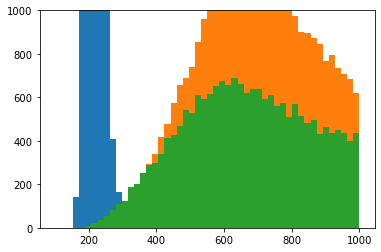

In [25]:
plt.hist(test_4cl_nsb['asum'], bins = 50, range = [100, 1000], )
plt.hist(test_4cl_shower['asum'], bins = 50, range = [100, 1000])
plt.hist(test_4cl_proton['asum'], bins = 50, range = [100, 1000])
plt.ylim(0, 1000)

In [26]:
energy_list = [item for sublist in energy_tmp for item in sublist]

In [27]:
flat_list = [item for sublist in asum_tmp for item in sublist]

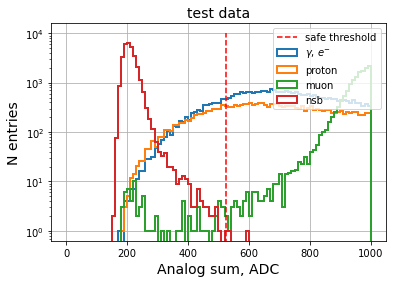

In [28]:
plt.hist(test_4cl_shower['asum'], range = [0, 1000], bins= 100, histtype='step', linewidth=2, label='$\gamma$, $e^{-}$')
plt.hist(test_4cl_proton['asum'], range = [0, 1000], bins= 100, histtype='step', linewidth=2, label='proton')

plt.hist(flat_list, range = [0, 1000], bins= 100, histtype='step', linewidth=2, label='muon')
#plt.hist(muons_as_nsb_flat, range = [0, 1000], bins= 100)

plt.hist(test_4cl_nsb['asum'], range = [0, 1000], bins= 100, histtype='step', linewidth=2, label='nsb')
plt.plot([525.7,525.7], [0., 10e3], '--r', label='safe threshold')
#lt.plot([476,476], [0., 10e3], '--', c = 'tab:blue', label='threshold == ResNet.')

plt.yscale('log')
#plt.xscale('log')
plt.xlabel("Analog sum, ADC", fontsize=14)
#plt.title('train & validate showers set')
plt.ylabel("N entries", fontsize=14)
plt.title('test data', fontsize=14)
plt.grid()
#plt.ylim(0, 500)
plt.legend()
plt.savefig('test_asum.png', dpi=800)

NameError: name 'nsb_as_shower_flat' is not defined

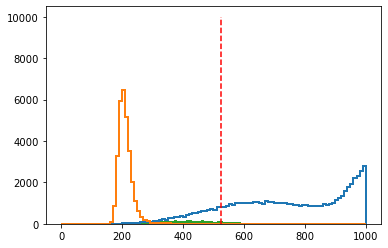

In [29]:
plt.hist(test_4cl_shower['asum'] + test_4cl_proton['asum'] + flat_list, range = [0, 1000], bins= 100, histtype='step', linewidth=2, label='p + $\gamma$, $e^{-}$ + muon')
plt.hist(test_4cl_nsb['asum'], range = [0, 1000], bins= 100, histtype='step', linewidth=2, label='nsb')
plt.plot([525.7,525.7], [0., 10e3], '--r', label='safe threshold')

#plt.hist(muons_as_nsb_flat, range = [0, 1000], bins= 100, alpha = 0.4, label='muon as nsb')
#plt.hist(shower_as_nsb_flat, range = [0, 1000], bins= 100, alpha = 0.4, label='shower as nsb')
#plt.hist(proton_as_nsb_flat, range = [0, 1000], bins= 100, alpha = 0.4, label='proton as nsb')

plt.hist(muons_as_nsb_flat + shower_as_nsb_flat + proton_as_nsb_flat, range = [0, 1000], bins= 100, linewidth=2, label='not triggered')
plt.hist(nsb_as_shower_flat + nsb_as_proton_flat, range = [0, 1000], bins= 100, linewidth=2, label='fake triggered')


plt.yscale('log')
#plt.xscale('log')
plt.xlabel("Analog sum, ADC", fontsize=14)
#plt.title('train & validate showers set')
plt.ylabel("N entries", fontsize=14)
#plt.title('test data', fontsize=14)
plt.grid()
plt.ylim(0, 10000)
plt.xlim(100, 900)
plt.legend(loc = 5, fontsize=9)
plt.savefig('test_asum_wrong.png', dpi=300)

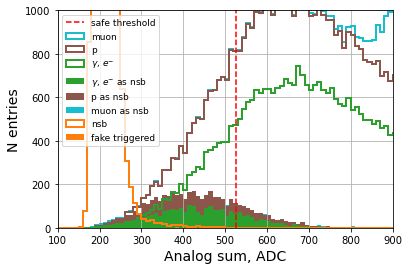

In [280]:
#plt.hist(test_4cl_shower['asum'], range = [0, 1000], bins= 100, histtype='step', linewidth=2, label='$\gamma$, $e^{-}$')
#plt.hist(test_4cl_proton['asum'], range = [0, 1000], bins= 100, histtype='step', linewidth=2, label='p')
#plt.hist(flat_list, range = [0, 1000], bins= 100, histtype='step', linewidth=2, label='muon')

fig = plt.figure()
ax = fig.add_subplot(111)

hist_reco_all = ax.hist([test_4cl_shower['asum'], test_4cl_proton['asum'], flat_list], range = [0, 1000], bins= 100, stacked=True, histtype='step', color = ['tab:green', 'tab:brown', 'tab:cyan'], linewidth=2, label=['$\gamma$, $e^{-}$', 'p', 'muon'])
hist_wrong = ax.hist([shower_as_nsb_flat, proton_as_nsb_flat, muons_as_nsb_flat], range = [0, 1000], bins= 100, stacked=True, color = ['tab:green', 'tab:brown', 'tab:cyan'], label = ['$\gamma$, $e^{-}$ as nsb', 'p as nsb', 'muon as nsb'])

safe_threshold = ax.plot([525.7,525.7], [0., 10e3], '--r', label='safe threshold')


nsb_all = ax.hist(test_4cl_nsb['asum'], range = [0, 1000], bins= 100, histtype='step', linewidth=2, color = 'tab:orange', label='nsb')
fake_trigger = ax.hist(nsb_as_shower_flat + nsb_as_proton_flat, range = [0, 1000], bins= 100, linewidth=2, color = 'tab:orange', label='fake triggered')

#h, l = ax.get_legend_handles_labels()

#labels = ["Title 1:", "Title 2:"] + l
#plt.legend(handles, labels)

#plt.yscale('log')
plt.xlabel("Analog sum, ADC", fontsize=14)
plt.ylabel("N entries", fontsize=14)
#plt.title('test data', fontsize=14)
plt.grid()
plt.ylim(0, 1000)
plt.xlim(100, 900)

plt.legend(loc = 2, fontsize=9)
plt.savefig('test_asum_4cl_wrong.png', dpi=300)

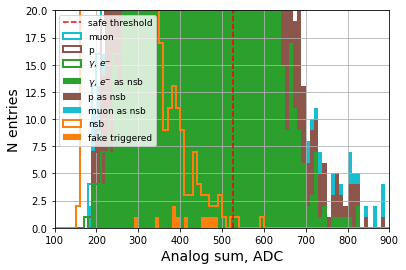

In [279]:
#plt.hist(test_4cl_shower['asum'], range = [0, 1000], bins= 100, histtype='step', linewidth=2, label='$\gamma$, $e^{-}$')
#plt.hist(test_4cl_proton['asum'], range = [0, 1000], bins= 100, histtype='step', linewidth=2, label='p')
#plt.hist(flat_list, range = [0, 1000], bins= 100, histtype='step', linewidth=2, label='muon')

fig = plt.figure()
ax = fig.add_subplot(111)

hist_reco_all = ax.hist([test_4cl_shower['asum'], test_4cl_proton['asum'], flat_list], range = [0, 1000], bins= 100, stacked=True, histtype='step', color = ['tab:green', 'tab:brown', 'tab:cyan'], linewidth=2, label=['$\gamma$, $e^{-}$', 'p', 'muon'])
hist_wrong = ax.hist([shower_as_nsb_flat, proton_as_nsb_flat, muons_as_nsb_flat], range = [0, 1000], bins= 100, stacked=True, color = ['tab:green', 'tab:brown', 'tab:cyan'], label = ['$\gamma$, $e^{-}$ as nsb', 'p as nsb', 'muon as nsb'])

safe_threshold = ax.plot([525.7,525.7], [0., 10e3], '--r', label='safe threshold')


nsb_all = ax.hist(test_4cl_nsb['asum'], range = [0, 1000], bins= 100, histtype='step', linewidth=2, color = 'tab:orange', label='nsb')
fake_trigger = ax.hist(nsb_as_shower_flat + nsb_as_proton_flat, range = [0, 1000], bins= 100, linewidth=2, color = 'tab:orange', label='fake triggered')

#h, l = ax.get_legend_handles_labels()

#labels = ["Title 1:", "Title 2:"] + l
#plt.legend(handles, labels)

#plt.yscale('log')
plt.xlabel("Analog sum, ADC", fontsize=14)
plt.ylabel("N entries", fontsize=14)
#plt.title('test data', fontsize=14)
plt.grid()
plt.ylim(0, 20)
plt.xlim(100, 900)

plt.legend(loc = 2, fontsize=9)
#plt.savefig('test_asum_4cl_wrong.png', dpi=300)

In [30]:
nsb_all = np.array(test_4cl_nsb['asum'])

In [31]:
showers = np.append(test_4cl_shower['asum'], test_4cl_proton['asum'])
showers = np.append(showers, flat_list)

In [32]:
len(nsb_all[nsb_all>500])

4

In [297]:
threshold = np.arange(200, 1000, 10)
tpr = []
fpr = []

for thr in threshold:
    tp = len(nsb_all[nsb_all < thr])
    fn = len(showers[showers < thr])
    tpr.append(tp/(tp + fn))
    
    fp = len(nsb_all[nsb_all >= thr])
    tn = len(showers[showers >= thr])
    fpr.append(fp/(fp+tn))

In [301]:
fpr_cnn = [0.0005043508668110231,
 0.000424133891664086,
 0.0003773610334301444,
 0.0003506973481885133,
 0.000317233186641108,
 0.0002836764467498784,
 0.00025682790502774415,
 0.00024343568902443147,
 0.0002232762061989594,
 0.00021661285191126997,
 0.00020317357118186067,
 0.00020327406764960972,
 0.0002033829361716552,
 0.00020346983898753408,
 0.00019676758355837212,
 0.00019686108395785816,
 0.0001969319362483787,
 0.0001902316069815,
 0.00019029754380241678,
 0.0001699685898046041,
 0.00017003217008658037,
 0.00016328196754770896,
 0.00016333308379667754,
 0.00016338868124910646,
 0.00016344320348678833,
 0.00016349442075289181,
 0.0001635434412265758,
 0.0001636002972072066,
 0.00015001193276737923,
 0.00015006309471027592,
 0.0001432948256920799,
 0.0001433466668486942,
 0.00013657657165489832,
 0.00013661388816787115,
 0.00012982576016399043,
 0.00011620514993882141,
 0.00011624170068445848,
 0.00010944661057527874,
 0.00010948180891318777,
 0.0001095185291661533,
 0.00010270947597625356,
 0.00010274887489981984,
 9.59344356656822e-05,
 9.596336941099054e-05,
 9.599100427159969e-05,
 8.917179976129395e-05,
 8.920300545510687e-05,
 8.922810822683158e-05,
 8.925383791503035e-05,
 8.92869407546807e-05,
 8.245212623420526e-05,
 8.247932861826505e-05,
 7.563464341703568e-05,
 7.565909387917931e-05,
 7.568303943086355e-05,
 7.571377440048457e-05,
 6.886198680604332e-05,
 6.889139959767422e-05,
 6.20240515488784e-05,
 6.204842534885004e-05,
 6.207153399451012e-05,
 6.209680201469624e-05,
 5.522382908224899e-05,
 5.52455665432849e-05,
 5.527495837104698e-05,
 5.530323454793062e-05,
 4.84184460445588e-05,
 4.8441900860189755e-05,
 4.846202308176928e-05,
 4.848484848484849e-05,
 4.851072086931212e-05,
 4.853830365562767e-05,
 4.856962455680218e-05,
 4.860267314702309e-05,
 4.864252607586844e-05,
 4.867398167076919e-05,
 4.1753072330238964e-05,
 4.178272980501393e-05,
 3.4845391000132414e-05,
 3.487796201092378e-05,
 3.490718180358427e-05,
 3.494646202018508e-05,
 3.498215909885958e-05,
 3.501817443253048e-05,
 3.5055984407098137e-05,
 3.5101513577265454e-05,
 3.5156552126619835e-05,
 3.52226777688547e-05,
 3.529602778503307e-05,
 3.538144738424959e-05,
 2.1282633371169125e-05,
 1.423426757576189e-05,
 7.146430358036161e-06,
 7.183495201425205e-06,
 0.0,
 0.0]

tpr_cnn = [0.9740893454022007,
 0.9704045680962216,
 0.9673075991669492,
 0.9645314725837216,
 0.961865324891061,
 0.9596752888056296,
 0.9575406143671826,
 0.9558478832815116,
 0.9540029598510527,
 0.9524354208369078,
 0.9508516509658388,
 0.9492032582108337,
 0.9474258082867166,
 0.9460131121156896,
 0.9446952329181537,
 0.9431348953540502,
 0.941956921336664,
 0.94042913608131,
 0.9393020796616144,
 0.9382261130800104,
 0.9370165486850124,
 0.9360307202397677,
 0.9350236235206063,
 0.9339314082796001,
 0.9328635101393135,
 0.9318632135947225,
 0.9309084134783318,
 0.9298041587198214,
 0.9289000418235048,
 0.9278221314519124,
 0.9266839738537852,
 0.9255469383030444,
 0.9242862096867415,
 0.9234322670054279,
 0.9224326880926562,
 0.9212672811059908,
 0.9202918565575657,
 0.9191090269636577,
 0.9181171067738232,
 0.9170852542489507,
 0.9160366552119129,
 0.9148629478790098,
 0.9137568555758684,
 0.9128390101360606,
 0.9119646033845733,
 0.9107203862709818,
 0.9096637699622366,
 0.9088161094570331,
 0.9079494107763221,
 0.9068375099217598,
 0.9056484123748698,
 0.9046649472874531,
 0.9035632781254943,
 0.9026047309498014,
 0.9016685456595265,
 0.9004706253236956,
 0.8991568296795953,
 0.8979051126030042,
 0.8969005113483448,
 0.8957554037406205,
 0.8946732589095953,
 0.8934939005317485,
 0.8921209958061925,
 0.8909880806505515,
 0.8894622125350296,
 0.8880007105426769,
 0.8863696808510638,
 0.8849966806815667,
 0.8838232044198895,
 0.882497021051238,
 0.881000110144289,
 0.879411570684082,
 0.8776168531928901,
 0.875733555224665,
 0.8734766085703053,
 0.871706009285294,
 0.8696049227022679,
 0.8676805588701104,
 0.8656551664430111,
 0.8631517610497238,
 0.8609221629068365,
 0.857948816955188,
 0.8552701922460064,
 0.8525900660839906,
 0.8498002719700833,
 0.8464729412262694,
 0.8424966295921806,
 0.8377846205408576,
 0.8326393804388558,
 0.826752935339838,
 0.820737487944514,
 0.813182344928538,
 0.8037899644314048,
 0.7922947410121819,
 0.7749384892574152,
 0.7438262421898244]

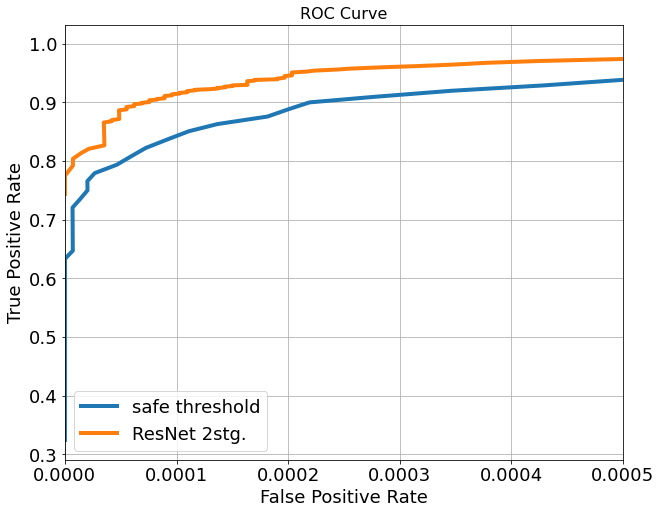

In [336]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(fpr, tpr, '-', linewidth=4, label='safe threshold')
ax.plot(fpr_cnn, tpr_cnn, '-', linewidth=4, label='ResNet 2stg.')
#ax.xlim(0, 0.0005)
#plt.ylim(0, 0.01)

ax.grid()
ax.set_xlabel('False Positive Rate', fontsize=18)
ax.set_ylabel('True Positive Rate', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.legend(fontsize=18)
ax.set_xlim(0., 0.0005)
ax.set_title("ROC Curve", fontsize=16)
plt.savefig('roc_curve.png', dpi=300)

In [338]:
100 - 100*(85+451+27)/(85+451+27+44737)

98.75717439293598

In [339]:
100*(23+25)/(23+25+198966)

0.024118906207603485

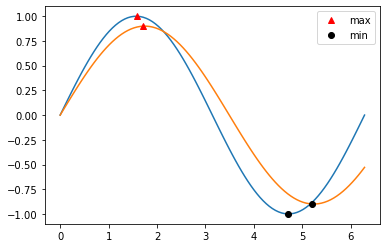

In [235]:
import matplotlib.pyplot as plt
import numpy as np

# Generate data for plotting:  
x = np.linspace(0,2*np.pi,100)
y0 = np.sin(x)
y1 = .9*np.sin(.9*x)
# Find their maxima and minima and store
maxes = np.empty((2,2))
mins = np.empty((2,2))
for k,y in enumerate([y0,y1]):
    maxloc = y.argmax()
    maxes[k] = x[maxloc], y[maxloc]
    minloc = y.argmin()
    mins[k] = x[minloc], y[minloc]

# Instantiate figure and plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y0, label='y0')
ax.plot(x,y1, label='y1')
# Plot maxima and minima, and keep references to the lines
maxline, = ax.plot(maxes[:,0], maxes[:,1], 'r^')
minline, = ax.plot(mins[:,0], mins[:,1], 'ko')

# Add first legend:  only labeled data is included
leg1 = ax.legend(loc='lower left')
# Add second legend for the maxes and mins.
# leg1 will be removed from figure
leg2 = ax.legend([maxline,minline],['max','min'], loc='upper right')
# Manually add the first legend back
#ax.add_artist(leg1)

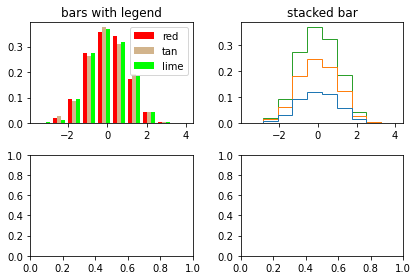

In [106]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

n_bins = 10
x = np.random.randn(1000, 3)

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=True, histtype='step', stacked=True)
ax1.set_title('stacked bar')

#ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
#ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
#x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
#ax3.hist(x_multi, n_bins, histtype='bar')
#ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

In [109]:
x

array([[ 1.04930431,  0.86609917,  0.5511346 ],
       [ 1.72807779, -0.64928812, -0.47841958],
       [ 1.07788511,  0.96881033, -0.80934479],
       ...,
       [-0.79704914, -2.08514886, -0.34828915],
       [ 0.07050817,  0.39995811, -0.91531697],
       [-1.03880531, -0.56047396, -0.95100945]])

In [88]:
100*(85+2137+2439)/(44737+85+451+27 + 270+2137+31110+6483 + 103+2439+21246+40605)

3.1137060517191855

In [20]:
test_4cl_shower['asum'][float(test_4cl_shower['asum']) < 500]

TypeError: float() argument must be a string or a number, not 'list'

In [86]:
asum_threshold = 443
n_low_muons = 0
n_low_shower = 0
n_low_proton = 0
n_high_nsb = 0

for index in range(len(flat_list)):
    if flat_list[index] < asum_threshold:
        n_low_muons = n_low_muons + 1

print('N showers : ' , n_low_muons )

for index in range(len(test_4cl_shower['asum'])):
    if test_4cl_shower['asum'][index] < asum_threshold:
        n_low_shower = n_low_shower + 1

print('N showers : ' , n_low_shower )

for index in range(len(test_4cl_proton['asum'])):
    if test_4cl_proton['asum'][index] <asum_threshold:
        n_low_proton = n_low_proton + 1

print('N showers : ' , n_low_proton )

n_high_nsb = 0
for index in range(len(test_4cl_nsb['asum'])):
    if test_4cl_nsb['asum'][index] > asum_threshold:
        n_high_nsb = n_high_nsb + 1

print('N showers : ' , n_high_nsb )

print('fake trigger rate: ', 100*n_high_nsb/len(test_4cl_nsb['asum']))
print('efficency         : ', 100 - 100*(n_low_shower+n_low_muons+n_low_proton + n_low_muons)/(len(test_4cl_shower['asum']) + len(test_4cl_proton['asum']) + len(flat_list) ))

N showers :  60
N showers :  2423
N showers :  2436
N showers :  21
fake trigger rate:  0.0525
efficency         :  96.85845705380184


In [65]:
100*(n_low_shower+n_low_muons+n_low_proton + n_low_muons)/(len(test_4cl_shower['asum']) + len(test_4cl_proton['asum']) + len(flat_list) )

4.489901507360132

In [62]:
n_low_muons = 0

#asum_threshold = 525.7
asum_threshold = 479.0

for index in range(len(flat_list)):
    if flat_list[index] < asum_threshold:
        n_low_muons = n_low_muons + 1

print('N showers : ' , n_low_muons )

N showers :  63


In [63]:
n_low_shower = 0

#asum_threshold = 525.7
asum_threshold = 479.0

for index in range(len(test_4cl_shower['asum'])):
    if test_4cl_shower['asum'][index] < asum_threshold:
        n_low_shower = n_low_shower + 1

print('N showers : ' , n_low_shower )

N showers :  3651


In [53]:
n_low_proton = 0

#asum_threshold = 525.7
asum_threshold = 479.0

for index in range(len(test_4cl_proton['asum'])):
    if test_4cl_proton['asum'][index] <asum_threshold:
        n_low_proton = n_low_proton + 1

print('N showers : ' , n_low_proton )

N showers :  3339


In [54]:
asum_threshold = 479.0
#asum_threshold = 525.7

n_high_nsb = 0
for index in range(len(test_4cl_nsb['asum'])):
    if test_4cl_nsb['asum'][index] > asum_threshold:
        n_high_nsb = n_high_nsb + 1

print('N showers : ' , n_high_nsb )

N showers :  10


In [55]:
100*n_high_nsb/len(test_4cl_nsb['asum'])

0.025

In [56]:
100 - 100*(n_low_shower+n_low_muons+n_low_proton + n_low_muons)/(len(test_4cl_shower['asum']) + len(test_4cl_proton['asum']) + len(flat_list) )

95.51009849263987

In [38]:
n_low_muons/len(flat_list)*100

0.11645962732919254

In [39]:
n_low_shower/len(test_4cl_shower['asum'])*100

5.669870948705605

In [40]:
n_low_proton/len(test_4cl_proton['asum'])*100

8.3475

In [41]:
n_high_nsb/len(test_4cl_nsb['asum'])*100

0.025

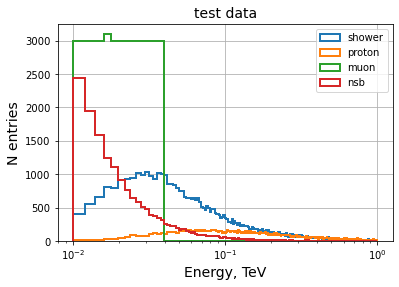

In [44]:
plt.hist(test_4cl_shower['energy TeV.'], bins= 500, range = [0.01, 1], histtype='step', linewidth=2, label='shower')
plt.hist(test_4cl_proton['energy TeV.'], bins= 500, range = [0.01, 1], histtype='step', linewidth=2, label='proton')
plt.hist(energy_list, bins= 500, range = [0.01, 1], histtype='step', linewidth=2, label='muon')


plt.hist(test_4cl_nsb['energy TeV.'], bins= 500, range = [0.01, 1], histtype='step', linewidth=2, label='nsb')

plt.xscale('log')
plt.xlabel("Energy, TeV", fontsize=14)
plt.title('test data', fontsize=14)
plt.ylabel("N entries", fontsize=14)
plt.legend()
plt.grid()
plt.savefig('test_Energy.png', dpi=200)

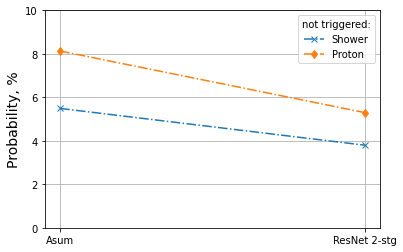

In [92]:
labels = ['Asum', "ResNet 2-stg", "ResNet 50", "ResNet 1-stg"]

loss_shower = [5.49, 3.8, 1.7]
loss_proton = [8.13, 5.3, 2.8]
#loss_muon = [6.11, 5.0, 4.9]

plt.plot(labels[:-2], loss_shower[:-1], 'x-.', label='Shower')
plt.plot(labels[:-2], loss_proton[:-1], 'd-.', label='Proton')

#plt.plot(labels[-3], 1.92, 's', label='Shower + Proton')
plt.ylabel("Probability, %", fontsize=14)
plt.grid()
plt.legend(title = 'not triggered:')
plt.ylim(0, 10)
#plt.litle('at ')
plt.savefig('loss_showers_comparison.png', dpi=200)
plt.show()


(3.0, 9.0)

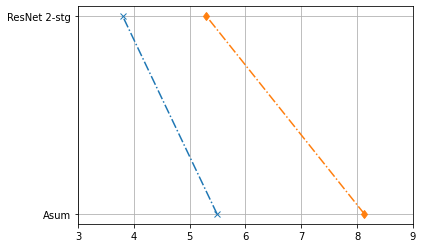

In [91]:
plt.plot(loss_shower[:-1], labels[:-2], 'x-.', label='Shower')
plt.plot(loss_proton[:-1], labels[:-2], 'd-.', label='Proton')
plt.grid()
plt.xlim(3, 9)

In [143]:
nsb_data = ['nsb']*len(test_4cl_nsb['energy TeV.'])

data_test = [test_4cl_shower['shower_type'], test_4cl_proton['shower_type'], 
          test_4cl_muon['shower_type'], nsb_data]

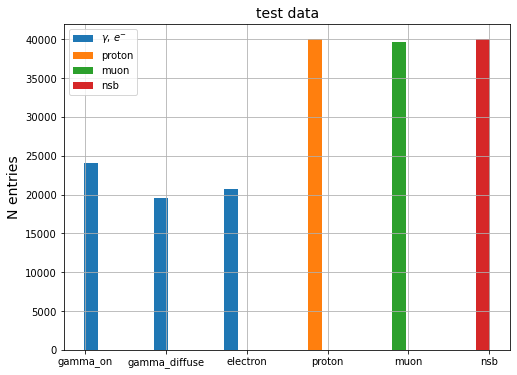

In [144]:
fig, ax0  = plt.subplots(1, figsize=(8,6))

plt.hist(data_test, label=['$\gamma$, $e^{-}$', 'proton', 'muon', 'nsb'], bins=6, range = [-0.1, 5.1])
#plt.hist(data_test_v2, color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red'], bins=7, range = [-0.35, 5.4])
#plt.hist(data_test, label=['shower', 'proton', 'muon', 'nsb'], bins=6)

plt.grid()
plt.title('test data', fontsize=14)
plt.legend()
plt.ylabel("N entries", fontsize=14)
plt.savefig('test_4cl_v2.png', dpi=800)

In [18]:
len(test_4cl_nsb['energy TeV.']) + len(test_4cl_muon['energy TeV.']) + len(test_4cl_shower['energy TeV.']) + len(test_4cl_proton['energy TeV.'])

184035

In [167]:
train_nsb1x = read_json_data(path_to_files + '4_clases_train_nsb_1x_anomaly.json')

In [168]:
train_nsb2x = read_json_data(path_to_files + '4_clases_train_nsb_2x_anomaly.json')

In [169]:
train_nsb3x = read_json_data(path_to_files + '4_clases_train_nsb_3x_anomaly.json')

In [127]:
data_original = train_nsb2x['asum']

In [170]:
def clean_data(data):
    result = []
    for i in range(len(data)):
        if np.isnan(data[i]) == False:
            result.append(data[i])
            
    return result

(array([8.813e+03, 8.038e+03, 5.170e+02, 4.700e+01, 2.100e+01, 7.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([159.2 , 207.22, 255.24, 303.26, 351.28, 399.3 , 447.32, 495.34,
        543.36, 591.38, 639.4 ]),
 <BarContainer object of 10 artists>)

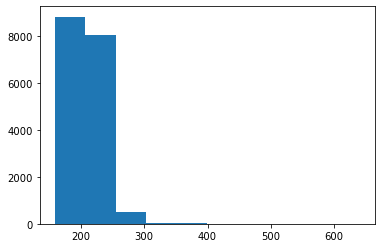

In [171]:
data_1 = clean_data(train_nsb1x['asum'])
data_2 = clean_data(train_nsb2x['asum'])
data_3 = clean_data(train_nsb3x['asum'])

plt.hist(data_1 + data_2 + data_3)

In [172]:
len(data_1 + data_2 + data_3 + data_1 + data_2 + data_3 + data_1 + data_2 + data_3 + data_1 + data_2 + data_3)

69792

In [196]:
data_nsb_corrected_1 = []


for i in range(len(train_nsb3x['asum'])):
    if np.isnan(train_nsb3x['asum'][i]) == False:
        data_nsb_corrected_2.append(train_nsb3x['asum'][i])

In [129]:
filtered = [element for element in data_original if element != 'nan']

In [150]:
np.isnan(data_nsb_corrected[0])

False

In [195]:
train_nsb3x['asum']

[187.8999999999996,
 226.5,
 nan,
 nan,
 nan,
 215.2000000000007,
 nan,
 218.1000000000004,
 nan,
 nan,
 nan,
 nan,
 nan,
 193.6000000000004,
 217.7000000000007,
 nan,
 nan,
 nan,
 204.5,
 nan,
 217.6000000000004,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 198.6000000000004,
 nan,
 186.7999999999993,
 194.1000000000004,
 197.7000000000007,
 216.1000000000004,
 248.2999999999993,
 213.1000000000004,
 nan,
 nan,
 nan,
 nan,
 197.2000000000007,
 nan,
 214.2000000000007,
 nan,
 241.8999999999996,
 nan,
 nan,
 nan,
 199.7000000000007,
 204.0,
 nan,
 236.2000000000007,
 nan,
 nan,
 225.0,
 252.0,
 nan,
 214.3999999999996,
 210.7999999999993,
 nan,
 nan,
 203.5,
 190.0,
 nan,
 247.0,
 nan,
 nan,
 194.2999999999993,
 nan,
 253.6000000000004,
 199.1000000000004,
 225.7999999999993,
 188.0,
 193.8999999999996,
 nan,
 nan,
 nan,
 nan,
 219.5,
 195.7000000000007,
 216.5,
 284.3999999999996,
 nan,
 nan,
 nan,
 267.6000000000004,
 nan,
 nan,
 nan,
 198.7999999999993,
 nan,
 nan,
 nan,
 217.7999999999993,


In [121]:
train_nsb2x['asum'][np.isnan(train_nsb2x['asum'])]

TypeError: only integer scalar arrays can be converted to a scalar index

(array([2.329e+03, 2.176e+03, 1.190e+02, 1.400e+01, 5.000e+00, 4.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([159.2 , 207.22, 255.24, 303.26, 351.28, 399.3 , 447.32, 495.34,
        543.36, 591.38, 639.4 ]),
 <BarContainer object of 10 artists>)

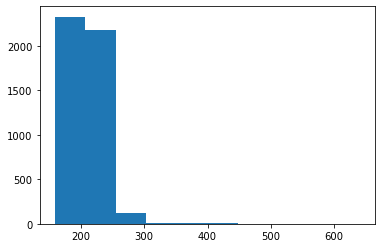

In [198]:
plt.hist(data_nsb_corrected_2)

In [199]:
len(data_nsb_corrected_2)

4649

In [200]:
np.sum(np.isnan(train_nsb2x['asum']) == True)

8898

In [154]:
nsb_data = ['nsb']*80000

In [155]:
data_test = [train_4cl_shower['shower_type'], train_4cl_proton['shower_type'], 
          train_4cl_muon['shower_type'], nsb_data]

In [109]:
data_test_v2 = [validation_4cl_shower['shower_type'], validation_4cl_proton['shower_type'],
          validation_4cl_muon['shower_type'], nsb_data]

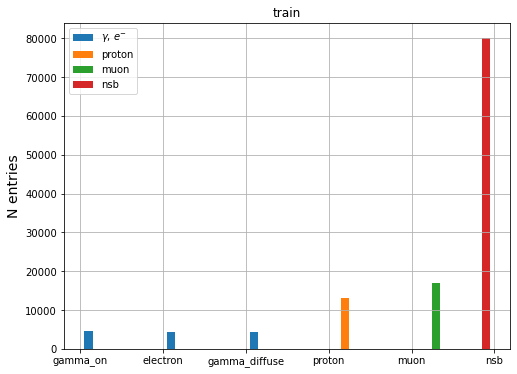

In [160]:
fig, ax0  = plt.subplots(1, figsize=(8,6))

plt.hist(data_test, label=['$\gamma$, $e^{-}$', 'proton', 'muon', 'nsb'])
#plt.hist([train_4cl_shower['shower_type'], train_4cl_proton['shower_type'], train_4cl_muon['shower_type'], ['nsb']*80000], 
#         label=['shower', 'proton', 'muon'], orientation='horizontal')

#plt.hist([validation_4cl_shower['shower_type'], validation_4cl_proton['shower_type'], validation_4cl_muon['shower_type']], 
#         label=['shower', 'proton', 'muon'], orientation='horizontal')

plt.grid()
plt.title('train')
plt.legend()
plt.ylabel("N entries", fontsize=14)
plt.savefig('train_4cl.png', dpi=200)

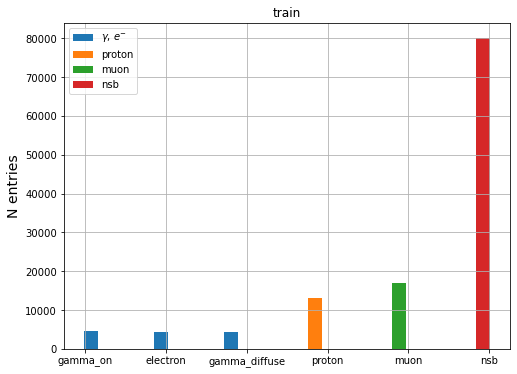

In [162]:
fig, ax0  = plt.subplots(1, figsize=(8,6))

plt.hist(data_test, label=['$\gamma$, $e^{-}$', 'proton', 'muon', 'nsb'], bins=6, range = [-0.1, 5.1])
#plt.hist(data_test_v2, color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red'], bins=7, range = [-0.35, 5.4])
#plt.hist(data_test, label=['shower', 'proton', 'muon', 'nsb'], bins=6)

plt.grid()
plt.title('train')
plt.legend()
plt.ylabel("N entries", fontsize=14)
plt.savefig('train_4cl_v2.png', dpi=800)

Text(0, 0.5, 'N entries')

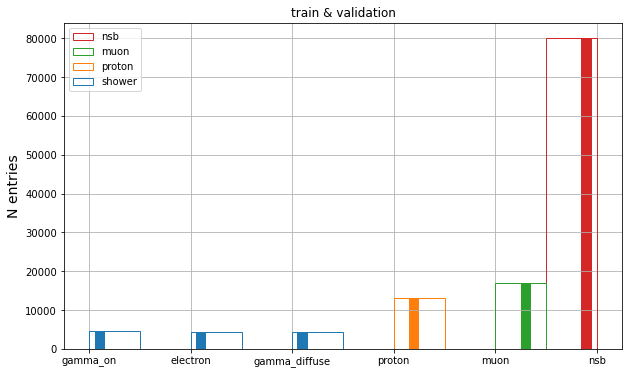

In [80]:
fig, ax0  = plt.subplots(1, figsize=(10,6))

plt.hist(data_test, label=['shower', 'proton', 'muon', 'nsb'], histtype='step')
plt.hist(data_test, color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
#plt.hist(data_test, label=['shower', 'proton', 'muon', 'nsb'], bins=6)

plt.grid()
plt.title('train & validation')
plt.legend()
plt.ylabel("N entries", fontsize=14)
#plt.savefig('train_4cl.png', dpi=800)

(array([ 4662.,     0.,  4438.,     0.,  4262.,     0.,     0., 13034.,
            0., 17097.,     0., 80000.]),
 array([0.        , 0.41666667, 0.83333333, 1.25      , 1.66666667,
        2.08333333, 2.5       , 2.91666667, 3.33333333, 3.75      ,
        4.16666667, 4.58333333, 5.        ]),
 <BarContainer object of 12 artists>)

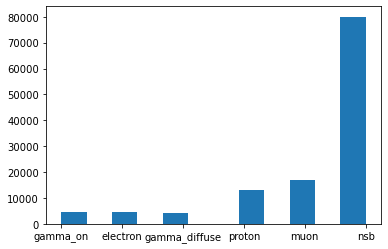

In [90]:
plt.hist(data_test_v2, bins =12)
#plt.hist(data_test_v2, bins =12)

In [151]:
nsb_data_all = [data_1 + data_2 + data_3 + data_1 + data_2 + data_3 + data_1 + data_2 + data_3 + data_1 + data_2 + data_3]

NameError: name 'data_1' is not defined

In [227]:
nsb_data_all = np.array(nsb_data_all)
nsb_data_all_cut = nsb_data_all[nsb_data_all>504]
print(len(nsb_data_all_cut))

12


In [58]:
labels = ['Asum', "VGG16", "ResNet 2-stg", "ResNet 50", "ResNet 2-stg 2k"]
eff = [69.74, 81.03, 78.51, 98.93]
fake_trigger = [0.005, 3.7, 0.025, 0.13, 0.204]

loss_shower = [7.23, 18.4, 3.8, 1.7]

loss_proton = [10.23, 22.5, 5.3, 2.8]
loss_muon = [6.11, 5.0, 4.9]
total_lost = loss_shower + loss_proton + loss_muon


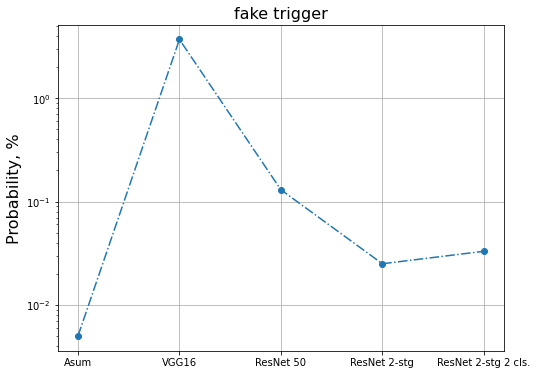

In [86]:
fig, ax3 = plt.subplots(1, 1, figsize=(8, 6))

labels = ['Asum', "VGG16", "ResNet 50", "ResNet 2-stg", "ResNet 2-stg 2 cls."]
fake_trigger = [0.005, 3.7, 0.13,  0.025, 0.033]


plt.plot(labels, fake_trigger, 'o-.', label='fake trigger')
plt.ylabel("Probability, %", fontsize=16)
plt.grid()
#plt.legend()
plt.yscale('log')
plt.title('fake trigger', fontsize=16)
plt.savefig('fake_trigger_all.png', dpi=200)
plt.show()

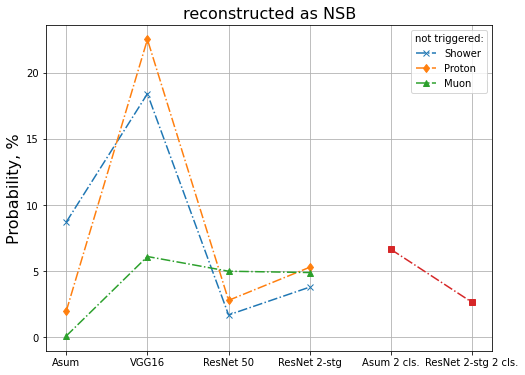

In [85]:
fig, ax3 = plt.subplots(1, 1, figsize=(8, 6))

labels = ['Asum', "VGG16", "ResNet 50", "ResNet 2-stg", 'Asum 2 cls.', "ResNet 2-stg 2 cls."]

loss_shower = [8.71, 18.4, 1.7, 3.8]
loss_proton = [1.98, 22.5, 2.8, 5.3]
loss_muon = [0.11, 6.11, 5.0, 4.9]

plt.plot(labels[:-2], loss_shower, 'x-.', label='Shower')
plt.plot(labels[:-2], loss_proton, 'd-.', label='Proton')
plt.plot(labels[:-2], loss_muon, '^-.', label='Muon')

plt.plot(labels[-2:], [6.65, 2.65], 's-.')
plt.ylabel("Probability, %", fontsize=16)
plt.grid()

plt.title('reconstructed as NSB', fontsize=16)
plt.legend(title = 'not triggered:')
plt.savefig('loss_showers.png', dpi=200)
plt.show()

In [74]:
labels[-2:]

['ResNet 2-stg', 'ResNet 2-stg 2 cls.']

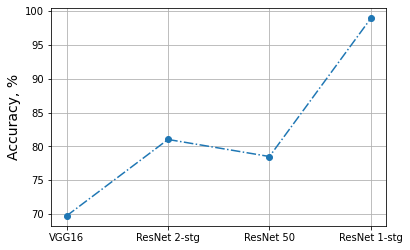

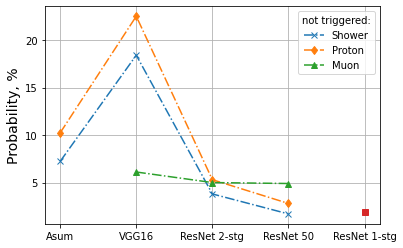

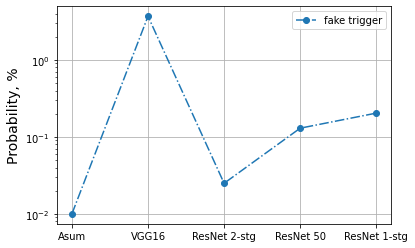

In [59]:
plt.plot(labels[1:], eff, 'o-.')
plt.grid()
plt.ylabel("Accuracy, %", fontsize=14)
plt.savefig('accuracy_all.png', dpi=200)
plt.show()


plt.plot(labels[:-1], loss_shower, 'x-.', label='Shower')
plt.plot(labels[:-1], loss_proton, 'd-.', label='Proton')
plt.plot(labels[1:-1], loss_muon, '^-.', label='Muon')

plt.plot(labels[-1], 1.92, 's')
plt.ylabel("Probability, %", fontsize=14)
plt.grid()
plt.legend(title = 'not triggered:')
plt.savefig('loss_showers.png', dpi=200)
plt.show()


plt.plot(labels, fake_trigger, 'o-.', label='fake trigger')
plt.ylabel("Probability, %", fontsize=14)
plt.grid()
plt.legend()
plt.yscale('log')
#plt.savefig('fake_trigger_all.png', dpi=200)
plt.show()

In [49]:
total_lost = np.array(loss_shower) + np.array(loss_proton) + np.array(loss_muon)
list(total_lost)

[47.01, 14.1, 9.4]

In [300]:
labels

['VGG16', 'ResNet 2-stg', 'ResNet 50', 'ResNet 1-stg']

In [308]:
data = list(total_lost)

In [310]:
data.append(1.92)

In [315]:
labels[-1]

'ResNet 1-stg'

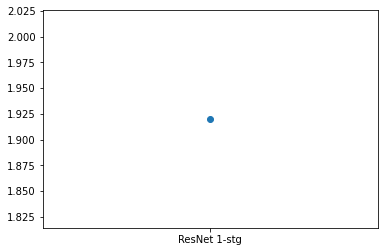

In [317]:
plt.plot(labels[-1], 1.92, 'o')

In [55]:
labels

['ASum', 'VGG16', 'ResNet 2-stg', 'ResNet 50', 'ResNet 1-stg']

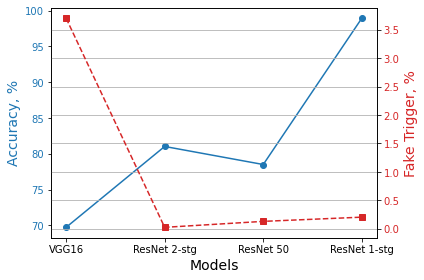

In [289]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Models',  fontsize=14)
ax1.set_ylabel('Accuracy, %', color=color,  fontsize=14)
ax1.plot(labels, eff, color=color, marker = 'o', linestyle = '-')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Fake Trigger, %', color=color,  fontsize=14)  # we already handled the x-label with ax1
ax2.plot(labels, fake_trigger, color=color, marker = 's', linestyle = '--')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()
plt.savefig('acc_fake_trigger_all.png', dpi=200)
plt.show()

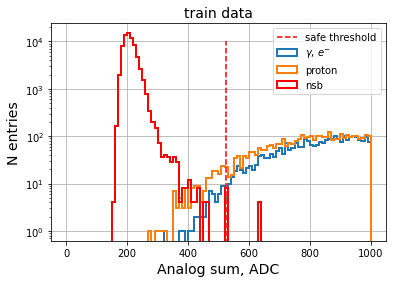

In [182]:
plt.hist(train_4cl_shower['asum'], range = [0, 1000], bins= 100, histtype='step', linewidth=2, color = 'tab:blue', label='$\gamma$, $e^{-}$')
plt.hist(train_4cl_proton['asum'], range = [0, 1000], bins= 100, histtype='step', linewidth=2, color = 'tab:orange', label='proton')

plt.hist(data_1 + data_2 + data_3 + data_1 + data_2 + data_3 + data_1 + data_2 + data_3 + data_1 + data_2 + data_3, range = [0, 1000], bins= 100, histtype='step', linewidth=2, color ='red', label='nsb')
plt.plot([525.7,525.7], [0., 10e3], '--r', label='safe threshold')
plt.yscale('log')
#plt.xscale('log')
plt.xlabel("Analog sum, ADC", fontsize=14)
#plt.title('train & validate showers set')
plt.ylabel("N entries", fontsize=14)
plt.title('train data', fontsize=14)
plt.grid()
plt.legend()
plt.savefig('train_asum.png', dpi=200)

In [217]:
100*51/(24949+51)

0.204

In [320]:
100*(2423 + 9010+ 11860)/(36065+2423+1115+38+288+9010+27028+3674+56+11860+25755+26722)

16.17187608481331

In [ ]:
100*(1936+1126+1100)/(36808+1936+881+16+96+1126+)

In [218]:
100*482/(24512+482)

1.9284628310794591

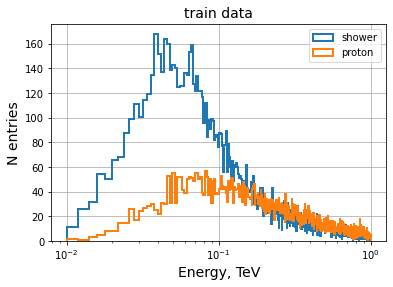

In [215]:
plt.hist(train_4cl_shower['energy TeV.'], bins= 500, range = [0.01, 1], histtype='step', linewidth=2, label='shower')
plt.hist(train_4cl_proton['energy TeV.'], bins= 500, range = [0.01, 1], histtype='step', linewidth=2, label='proton')

#plt.hist(data_nsb_corrected, histtype='step', label='nsb')

plt.xscale('log')
plt.xlabel("Energy, TeV", fontsize=14)
plt.title('train data', fontsize=14)
plt.ylabel("N entries", fontsize=14)
plt.legend()
plt.grid()
plt.savefig('train_Energy.png', dpi=200)

In [187]:
train_4cl_shower.keys()

dict_keys(['shower_type', 'energy TeV.', 'asum', 'off_axis', 'phi'])

In [175]:
for i in range(4):
    data_nsb_corrected = data_nsb_corrected + data_nsb_corrected

In [176]:
len(data_nsb_corrected)

27904

In [182]:
def return_data_name_all(file):

        #print('file : ', file)
    found_data = {}
    head, tail = os.path.split(file)

    run_number = 0
    shower_id = 0

    if tail.find('_run') != -1:
        end_run = tail.find('_run')
        shower_type = tail[:end_run]

        if shower_type.find('_') != -1:
            shower_type = shower_type[shower_type.find('_')+1:]

        len_id = ('_id_')
        id_index = tail.find('_id_')
        run_number = int(tail[end_run + len('_run_'):id_index])
        shower_id = int(tail[id_index + len('_id_'):-len('.jpg')])

        if shower_type.find('_nsbx1') != -1:
            shower_type = shower_type[:shower_type.find('_nsbx1')]
        if shower_type.find('nsb_') != -1:
            shower_type = shower_type[len('nsb_'):]

        if tail.find('electron') != -1:
            shower_type = 'electron'
        elif tail.find('gamma_on') != -1:
            shower_type = 'gamma_on'
        elif tail.find('gamma_diffuse') != -1:
            shower_type = 'gamma_diffuse'
        elif tail.find('proton') != -1:
            shower_type = 'proton'

        found_data = {'shower_type' : shower_type, 'run': run_number, 'id' : shower_id}

    elif file.find('muon') != -1:

        energy_gev, off_axis, phi = self.return_conditions_all(tail)
        shower_type = 'muon'
        found_data = {'shower_type': shower_type, 'energy TeV.': energy_gev/1000., 'off_axis': off_axis, 'phi' : phi}

    else:
        shower_type = 'undef'
        run_number = 0
        shower_id = 0
        found_data = {'shower_type': shower_type}

    return found_data

In [186]:
return_data_name_all('clipped_nsb_electron_run_1002_id_100603.jpg')

{'shower_type': 'electron', 'run': 1002, 'id': 100603}